In [1]:
import pandas as pd
import json
import matplotlib 
from matplotlib.pyplot import tight_layout
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

In [3]:
with open("current_results2.json", 'r') as f:
    data = json.load(f)
data = {**{i:k.strip("()").replace("'","").split(', ')+[0]+[v[0]] for i,(k,v) in enumerate(data.items())} , **{i+100:k.strip("()").replace("'","").split(', ')+[1]+[v[1]] for i,(k,v) in enumerate(data.items())}, **{i+200:k.strip("()").replace("'","").split(', ')+[2]+[v[2]] for i,(k,v) in enumerate(data.items())}}
with open("current_results3.json", 'r') as f:
    data2 = json.load(f)
data2 = {**{i+300:k.strip("()").replace("'","").split(', ')+[0]+[v[0]] for i,(k,v) in enumerate(data2.items())} , **{i+400:k.strip("()").replace("'","").split(', ')+[1]+[v[1]] for i,(k,v) in enumerate(data2.items())}, **{i+500:k.strip("()").replace("'","").split(', ')+[2]+[v[2]] for i,(k,v) in enumerate(data2.items())}}

data = {**data, **data2}
data

{0: ['ALL_UNPERFORMED', 'AUTOMATIC', '10', 0, 723409],
 1: ['ALL_UNPERFORMED', 'GUIDED_LOCAL_SEARCH', '10', 0, 623532],
 2: ['ALL_UNPERFORMED', 'SIMULATED_ANNEALING', '10', 0, 673426],
 3: ['ALL_UNPERFORMED', 'GREEDY_DESCENT', '10', 0, 723409],
 4: ['ALL_UNPERFORMED', 'TABU_SEARCH', '10', 0, 474252],
 5: ['CHRISTOFIDES', 'AUTOMATIC', '10', 0, 523682],
 6: ['CHRISTOFIDES', 'GUIDED_LOCAL_SEARCH', '10', 0, 423883],
 7: ['CHRISTOFIDES', 'SIMULATED_ANNEALING', '10', 0, 374513],
 8: ['CHRISTOFIDES', 'GREEDY_DESCENT', '10', 0, 523682],
 9: ['CHRISTOFIDES', 'TABU_SEARCH', '10', 0, 374513],
 10: ['FIRST_UNBOUND_MIN_VALUE', 'AUTOMATIC', '10', 0, 5000000],
 11: ['FIRST_UNBOUND_MIN_VALUE', 'GUIDED_LOCAL_SEARCH', '10', 0, 5000000],
 12: ['FIRST_UNBOUND_MIN_VALUE', 'SIMULATED_ANNEALING', '10', 0, 5000000],
 13: ['FIRST_UNBOUND_MIN_VALUE', 'GREEDY_DESCENT', '10', 0, 5000000],
 14: ['FIRST_UNBOUND_MIN_VALUE', 'TABU_SEARCH', '10', 0, 5000000],
 15: ['GLOBAL_CHEAPEST_ARC', 'AUTOMATIC', '10', 0, 723409],

In [4]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.rename(columns={0:'fss', 1:'lsm', 2:'tlim', 3:'run', 4:'obj'})
df

,fss,lsm,tlim,run,obj
0,ALL_UNPERFORMED,AUTOMATIC,10,0,723409
1,ALL_UNPERFORMED,GUIDED_LOCAL_SEARCH,10,0,623532
2,ALL_UNPERFORMED,SIMULATED_ANNEALING,10,0,673426
3,ALL_UNPERFORMED,GREEDY_DESCENT,10,0,723409
4,ALL_UNPERFORMED,TABU_SEARCH,10,0,474252
...,...,...,...,...,...
545,SAVINGS,AUTOMATIC,1,2,3624154
546,SAVINGS,GUIDED_LOCAL_SEARCH,1,2,3972561
547,SAVINGS,SIMULATED_ANNEALING,1,2,3573813
548,SAVINGS,GREEDY_DESCENT,1,2,3972561


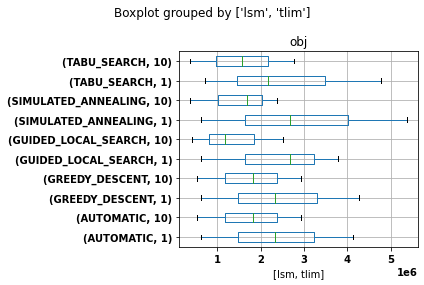

In [6]:
%matplotlib inline
df[df['fss'] == 'CHRISTOFIDES'].boxplot('obj',by=['lsm','tlim'],vert=False)
#df[df['obj'] < 8300000][df['tlim'] == '10'].boxplot('obj','lsm')
#df[df['obj'] < 8300000].boxplot('obj','fss')
tight_layout()

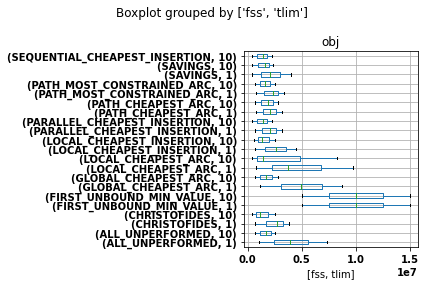

In [7]:
df[df['lsm'] == 'GUIDED_LOCAL_SEARCH'].boxplot('obj',by=['fss','tlim'],vert=False)
#df[df['obj'] < 8300000][df['tlim'] == '10'].boxplot('obj','lsm')
#df[df['obj'] < 8300000].boxplot('obj','fss')
tight_layout()